<a href="https://colab.research.google.com/github/bopo80776288/seo-keyword-optimization/blob/main/Seo_Keyword_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 專案說明（Project Statement）

本專案透過關鍵字資料分析與語意分群優化關鍵字策略，目的是將-老協珍-雞精品牌推上滴雞精推薦品牌的搜尋前三名(目前第7名)。
過程將聚焦於「滴雞精」相關搜尋詞，結合 SEO 四大指標（點擊率 CTR、曝光量 Impressions、平均排名 Position、點擊數量 Clicks）建立分析框架，並透過語意嵌入與分群演算法將關鍵字分成多個語意相近的群體。最終，我們分析各群表現，設計五種優化策略，協助品牌在不同搜尋場景中提升可見度與點擊率，達成精準投放與內容行銷目標。

In [2]:
!pip install tabulate
import warnings
import logging
import matplotlib

# Suppress only matplotlib font manager warnings
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

## Step 1: 整理與理解資料

首先我們在下載Excel檔案時就先轉檔為csv.檔，方便後續使用pandas讀取應用資料。初步觀察資料我們發現有空的行列，所以簡單清理將空白行列去除。

In [3]:
import pandas as pd

# First view of the data
url = "https://raw.githubusercontent.com/bopo80776288/seo-keyword-optimization/refs/heads/main/%E9%9B%B6%E4%B8%80%E7%AD%86%E8%A9%A6_%E9%97%9C%E9%8D%B5%E5%AD%97%E6%A8%A1%E6%93%AC%E6%95%B8%E6%93%9A%20-%20%E5%B7%A5%E4%BD%9C%E8%A1%A81.csv"
df = pd.read_csv(url)
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,Keyword,Impressions,Clicks,CTR,Position,輸出到google slides
1,NaN,滴雞精推薦,28500,3420,12.00%,1.8,TRUE
2,NaN,滴雞精推薦ptt,15600,1248,8.00%,2.3,TRUE
3,NaN,老協珍熬雞精,12400,1488,12.00%,1.5,TRUE
4,NaN,滴雞精品牌,11200,896,8.00%,2.1,TRUE


In [4]:
# Skip the first row and read data
df = pd.read_csv(url, skiprows=1)

# Drop the unnamed index column
df = df.drop(columns=df.columns[0])

# Drop the unrelated column
df = df.drop(columns=['輸出到google slides'])

df['CTR'] = df['CTR'].str.replace('%', '').astype(float)

df.head()

df.describe()


,Impressions,Clicks,CTR,Position
count,50.000000,50.000000,50.000000,50.000000
mean,3901.800000,244.160000,3.580000,54.924000
std,5055.078953,564.170309,2.585991,29.363469
min,60.000000,1.000000,2.500000,1.500000
25%,462.500000,11.250000,2.500000,38.575000
50%,2400.000000,59.500000,2.500000,62.200000
75%,5425.000000,135.250000,2.500000,77.425000
max,28500.000000,3420.000000,12.000000,95.500000


---
## Step 2: 運用四大指標建立二維的分析框架

我們透過四個 SEO 關鍵數據指標來分析整體關鍵字表現，並找出具有優化潛力或需要特別維護的關鍵字。這四大指標為：

- **CTR（點擊率）**：用來衡量使用者在看到搜尋結果後實際點擊的比例。
- **Impressions（曝光量）**：關鍵字在 Google 搜尋結果中出現的次數。
- **Position（平均排名）**：網站針對該關鍵字在搜尋結果中的平均排名位置。
- **Clicks（點擊次數）**：實際點擊次數，有助於補充評估效果。

透過資料視覺化，我們清楚了解關鍵字表現的整體分布趨勢：

### 📊 數據視覺化圖表說明：

1. **CTR 分佈圖**：觀察多數關鍵字的點擊率集中在哪個範圍，找出 CTR 偏低的潛力詞。
2. **Position 分佈圖**：分析平均搜尋排名的整體分佈，瞭解我們關鍵字是否大多集中在第一頁還是偏後段。
3. **CTR vs Position 氣泡圖（氣泡大小代表曝光量）**：視覺化觀察搜尋排名與點擊率之間的關係，並結合曝光量判斷關鍵字的重要性與優化潛力。
4. **Correlation Heatmap（相關係數熱力圖）**：統計分析指標間的關聯性，例如排名與 CTR 是否呈負相關、曝光量與 CTR 是否無明顯關聯等。

---

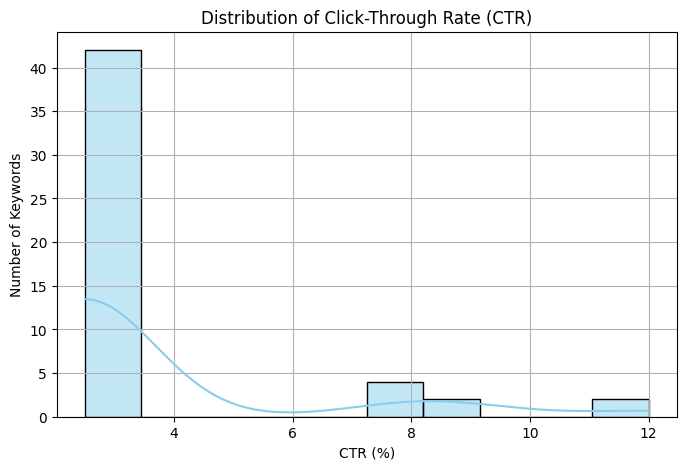

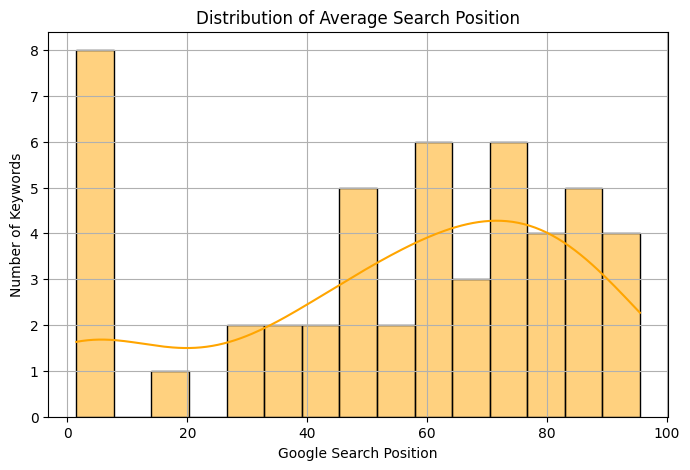

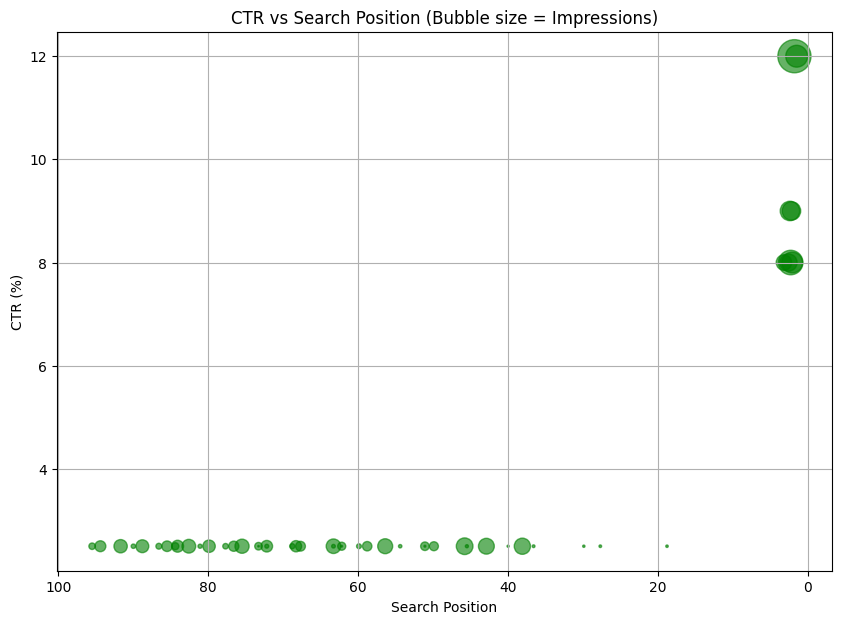

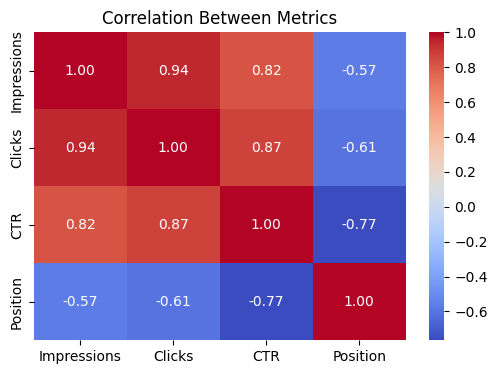

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of CTR
plt.figure(figsize=(8,5))
sns.histplot(df['CTR'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Click-Through Rate (CTR)')
plt.xlabel('CTR (%)')
plt.ylabel('Number of Keywords')
plt.grid(True)
plt.show()

# 2. Distribution of Search Position
plt.figure(figsize=(8,5))
sns.histplot(df['Position'], bins=15, kde=True, color='orange')
plt.title('Distribution of Average Search Position')
plt.xlabel('Google Search Position')
plt.ylabel('Number of Keywords')
plt.grid(True)
plt.show()

# 3. CTR vs Position with Impressions as bubble size
plt.figure(figsize=(10,7))
plt.scatter(df['Position'], df['CTR'], s=df['Impressions'] / 50, alpha=0.6, color='green')
plt.xlabel('Search Position')
plt.ylabel('CTR (%)')
plt.title('CTR vs Search Position (Bubble size = Impressions)')
plt.grid(True)
plt.gca().invert_xaxis()  # Position 1 is left
plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(6,4))
corr = df[['Impressions','Clicks','CTR','Position']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Metrics')
plt.show()

# -----------------------------
# Actionable Keyword Groupings

# High Impressions, Low CTR (<5%)
low_ctr = df[(df['Impressions'] > 5000) & (df['CTR'] < 5.0)].sort_values(by='Impressions', ascending=False)

# High CTR (>8%) and Top 3 Position - strong keywords to protect
strong_keywords = df[(df['CTR'] >= 8) & (df['Position'] <= 3)].sort_values(by='CTR', ascending=False)

# Poor position (>40) with decent impressions (>1000) - opportunities for ranking boost
poor_pos_high_impr = df[(df['Position'] > 40) & (df['Impressions'] > 1000)].sort_values(by='Position')

In [6]:
from tabulate import tabulate

# 1. High Impressions, Low CTR (<5%) - Optimize Titles/Meta
print("\n=== 高曝光、低 CTR (曝光 > 5000 且 CTR < 5%）===")
print(tabulate(low_ctr[['Keyword', 'Impressions', 'CTR', 'Position']], headers='keys', tablefmt='github', showindex=False))

# 2. Strong Keywords (CTR >= 8%, Position <= 3) - Maintain & Leverage
print("\n=== 高 CTR 且排名前 3（CTR ≥ 8%, 排名前 3） ===")
print(tabulate(strong_keywords[['Keyword', 'CTR', 'Position', 'Impressions']], headers='keys', tablefmt='github', showindex=False))

# 3. Poor Position (>40), High Impressions (>1000) - Content/Link Building Priority
print("\n=== 曝光不錯但排名後段（曝光 > 1000 且排名 > 40） ===")
print(tabulate(poor_pos_high_impr[['Keyword', 'Position', 'Impressions', 'CTR']], headers='keys', tablefmt='github', showindex=False))



=== 高曝光、低 CTR (曝光 > 5000 且 CTR < 5%）===
| Keyword      |   Impressions |   CTR |   Position |
|--------------|---------------|-------|------------|
| 田原香滴雞精 |          7200 |   2.5 |       45.8 |
| 滴雞精副作用 |          6800 |   2.5 |       38.1 |
| 滴雞精功效   |          6500 |   2.5 |       42.9 |
| 芳茲滴雞精   |          5800 |   2.5 |       56.4 |
| 農純鄉滴雞精 |          5500 |   2.5 |       63.3 |
| 滴雞精怎麼喝 |          5200 |   2.5 |       75.5 |

=== 高 CTR 且排名前 3（CTR ≥ 8%, 排名前 3） ===
| Keyword       |   CTR |   Position |   Impressions |
|---------------|-------|------------|---------------|
| 滴雞精推薦    |    12 |        1.8 |         28500 |
| 老協珍熬雞精  |    12 |        1.5 |         12400 |
| 滴雞精哪裡買  |     9 |        2.4 |          9800 |
| 滴雞精比較    |     9 |        2.2 |          8900 |
| 滴雞精推薦ptt |     8 |        2.3 |         15600 |
| 滴雞精品牌    |     8 |        2.1 |         11200 |
| 娘家滴雞精    |     8 |        2.6 |          7800 |

=== 曝光不錯但排名後段（曝光 > 1000 且排名 > 40） ===
| Keyword        |   Posi

### 分析分類與優化重點：

透過條件過濾，我們將關鍵字分為以下幾組，並針對不同類型設計優化方向：

- **高曝光、低 CTR**（曝光 > 5000 且 CTR < 5%）  
  → 建議重新撰寫網頁標題（Title）與描述（Meta Description），增加吸引力以提高點擊。

- **高 CTR 且排名前 3**（CTR ≥ 8%, 排名前 3）  
  → 為目前表現最佳的關鍵字，應持續追蹤並維護，亦可延伸相關內容進行擴展。

- **曝光不錯但排名後段**（曝光 > 1000 且排名 > 40）  
  → 屬於最具潛力的詞彙，建議透過內容增強、內外部連結、SEO 技術優化提升其搜尋排名。

這些分類提供了實際的優化方向，有助於後續針對具體關鍵字群設計內容行銷與 SEO 優化策略。


## Step 3：運用關鍵字語意分群建立分析框架  
**Semantic Grouping of Keywords with Sentence Transformers + Clustering**

為了更進一步了解使用者的搜尋意圖，我們使用語意嵌入技術（Sentence Embedding）與聚類方法（Clustering）對所有關鍵字進行分群。這樣能幫助我們針對不同的用戶需求設計更具針對性的 SEO 優化策略。

---

### 分群方法：

- **Embedding 技術**：使用多語言語意模型 `paraphrase-multilingual-MiniLM-L12-v2` 將每一個關鍵字轉換為向量表示，保留語意相似度。
- **聚類方法**：採用 Agglomerative Hierarchical Clustering 將語意相近的關鍵字自動分為 5 組。
- **可視化工具**：使用主成分分析（PCA）將高維向量壓縮為 2D 平面進行視覺化。

### 透過語意分群，我們能：

- 找出不同意圖的使用者類型
- 為每一群設計個別的內容策略（ex: 購買導向 vs 疑慮導向 vs 成分導向）
- 提升網站針對特定搜尋意圖的曝光與排名能力

---

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 857.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

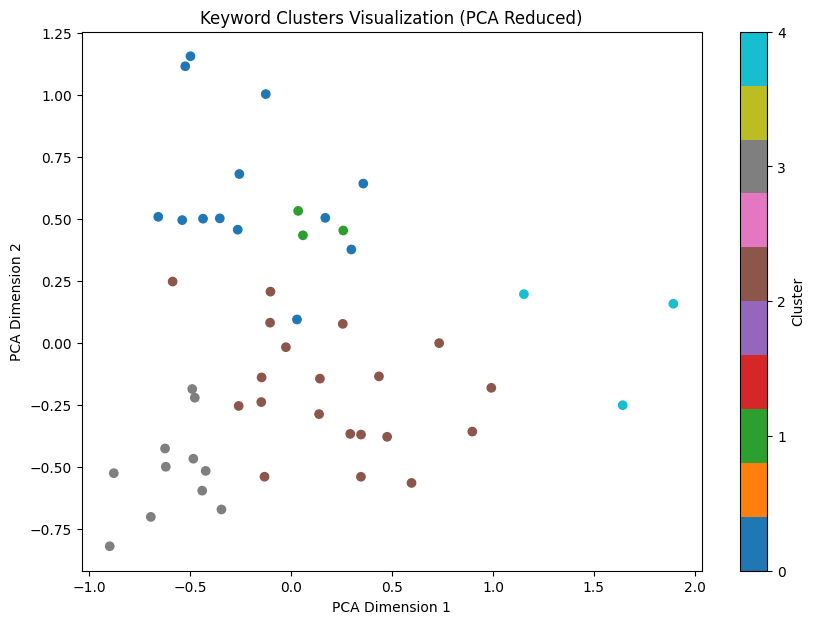

In [ ]:
!pip install -q sentence-transformers

import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

keywords = df['Keyword'].tolist()

model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')  # multilingual for Chinese + English

embeddings = model.encode(keywords)

num_clusters = 5
clustering_model = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = clustering_model.fit_predict(embeddings)

df['Cluster'] = cluster_labels

cluster_summary = df.groupby('Cluster')['Keyword'].apply(list).reset_index()

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.figure(figsize=(10,7))
scatter = plt.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1], c=cluster_labels, cmap='tab10')
plt.title('Keyword Clusters Visualization (PCA Reduced)')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(scatter, ticks=range(num_clusters), label='Cluster')
plt.show()


In [ ]:
for i, keywords_in_cluster in enumerate(cluster_summary['Keyword']):
    print(f"\n=== Cluster {i} ({len(keywords_in_cluster)} keywords) ===")
    print(", ".join(keywords_in_cluster[:]))


=== Cluster 0 (13 keywords) ===
滴雞精推薦, 滴雞精推薦ptt, 滴雞精品牌, 滴雞精價格, 滴雞精評比, 滴雞精dcard, 滴雞精推薦2024, 滴雞精排名, 滴雞精選購, 滴雞精認證, 滴雞精檢驗, 滴雞精保存期限, 滴雞精購買方式

=== Cluster 1 (3 keywords) ===
滴雞精副作用, 滴雞精優缺點, 滴雞精禁忌

=== Cluster 2 (20 keywords) ===
滴雞精哪裡買, 滴雞精比較, 娘家滴雞精, 滴雞精功效, 芳茲滴雞精, 農純鄉滴雞精, 滴雞精怎麼喝, 享食尚滴雞精, 桂格滴雞精, 雲嶺鮮雞滴雞精, 滴雞精vs熬雞精, 滴雞精ptt, 滴雞精飲用時間, 滴雞精效果, 滴雞精真假, 滴雞精好處, 滴雞精食安, 滴雞精品質, 滴雞精製程, 滴雞精口感

=== Cluster 3 (11 keywords) ===
純煉滴雞精, 滴雞精營養成分, 滴雞精補充品, 滴雞精食用方法, 滴雞精成分, 滴雞精包裝, 滴雞精保存, 滴雞精原料, 滴雞精成分表, 滴雞精製作過程, 滴雞精通路

=== Cluster 4 (3 keywords) ===
老協珍熬雞精, 田原香滴雞精, 白蘭氏萃雞精


In [ ]:
import pandas as pd

cluster_intents = {
    0: "用戶正在尋找滴雞精的推薦、品牌評比、價格與購買建議",
    1: "用戶關心滴雞精的副作用、禁忌與使用風險",
    2: "用戶想比較不同品牌的滴雞精，了解功效與飲用方式",
    3: "用戶對滴雞精的成分、營養、製作過程與包裝細節感興趣",
    4: "用戶直接搜尋特定滴雞精品牌名稱"
}

intent_df = pd.DataFrame([
    {"Cluster": k, "意圖說明 (User Intent)": v}
    for k, v in cluster_intents.items()
])

from tabulate import tabulate
print(tabulate(intent_df, headers="keys", tablefmt="github", showindex=False))

|   Cluster | 意圖說明 (User Intent)                             |
|-----------|----------------------------------------------------|
|         0 | 用戶正在尋找滴雞精的推薦、品牌評比、價格與購買建議 |
|         1 | 用戶關心滴雞精的副作用、禁忌與使用風險             |
|         2 | 用戶想比較不同品牌的滴雞精，了解功效與飲用方式     |
|         3 | 用戶對滴雞精的成分、營養、製作過程與包裝細節感興趣 |
|         4 | 用戶直接搜尋特定滴雞精品牌名稱                     |


## Step 4：評估各語意群的 SEO 表現  

我們已經將關鍵字依語意分群並理解其背後的使用者意圖，接下來的目標是使用 SEO 表現指標來評估各群的效果。

---

### 🎯 評估目的 / Evaluation Goals

- **識別表現不佳的語意群，進行優化**  
- **發現高表現語意群，加強利用**  

---

### 📊 使用指標 / Metrics Used

我們針對每個語意群計算以下平均值：

- **CTR（點擊率）**
- **Impressions（曝光次數）**
- **Position（平均排名）**
- **Keyword Count（該群中關鍵字數）**
- **Example Keywords（範例關鍵字）**

這些指標可幫助我們理解：
- **哪些語意群表現良好**
- **哪些語意群需要進一步優化**
---


In [ ]:
cluster_stats = df.groupby('Cluster').agg({
    'CTR': 'mean',
    'Impressions': 'mean',
    'Position': 'mean',
    'Keyword': 'count'
}).rename(columns={'Keyword': 'Keyword Count'})

example_keywords = df.groupby('Cluster')['Keyword'].apply(lambda x: ", ".join(x.head(3)))
cluster_stats['Example Keywords'] = example_keywords

cluster_stats = cluster_stats.round({'CTR': 2, 'Impressions': 0, 'Position': 2})

cluster_stats = cluster_stats.reset_index()

from tabulate import tabulate
print(tabulate(cluster_stats, headers='keys', tablefmt='pretty', showindex=False))


+---------+------+-------------+----------+---------------+------------------------------------------+
| Cluster | CTR  | Impressions | Position | Keyword Count |             Example Keywords             |
+---------+------+-------------+----------+---------------+------------------------------------------+
|    0    | 4.5  |   5684.0    |  42.91   |      13       |  滴雞精推薦, 滴雞精推薦ptt, 滴雞精品牌   |
|    1    | 2.5  |   3333.0    |  61.17   |       3       |  滴雞精副作用, 滴雞精優缺點, 滴雞精禁忌  |
|    2    | 3.42 |   3682.0    |  59.68   |      20       |   滴雞精哪裡買, 滴雞精比較, 娘家滴雞精   |
|    3    | 2.5  |   1243.0    |  61.38   |      11       | 純煉滴雞精, 滴雞精營養成分, 滴雞精補充品 |
|    4    | 5.67 |   7967.0    |  45.37   |       3       | 老協珍熬雞精, 田原香滴雞精, 白蘭氏萃雞精 |
+---------+------+-------------+----------+---------------+------------------------------------------+


### 語意分群（Cluster Summary）

---

### 群組 0 – 品牌推薦
**範例關鍵字**：滴雞精推薦、滴雞精推薦ptt、滴雞精品牌  
**使用者意圖說明**：  
- 使用者正在尋找品牌推薦  
- 商業意圖強烈，接近購買決策階段

---

### 群組 1 – 副作用與食用疑慮  
**範例關鍵字**：滴雞精副作用、滴雞精優缺點、滴雞精禁忌  
**使用者意圖說明**：  
- 使用者關注滴雞精的健康風險與副作用  
- 屬於認知初期或抱持懷疑態度者

---

### 群組 2 – 購買意圖與品牌比較  
**範例關鍵字**：滴雞精哪裡買、滴雞精比較    
**使用者意圖說明**：  
- 使用者已準備購買  
- 正在比較不同品牌與購買通路

---

### 群組 3 – 營養成分與產品形式  
**範例關鍵字**：純煉滴雞精、滴雞精營養成分、滴雞精補充品  
**使用者意圖說明**：  
- 關心產品的成分、營養與形式  
- 可能有特定健康需求或飲食考量

---

### 群組 4 – 特定品牌搜尋 
**範例關鍵字**：老協珍熬雞精、田原香滴雞精、白蘭氏萃雞精  
**使用者意圖說明**：  
- 搜尋特定品牌並進行比較  
- 顯示高度購買意圖與品牌偏好

---

## Step 5. 關鍵字優化策略與設計思維

針對五個關鍵字群我制定了五種 SEO 優化策略，其目標為提升「老協珍」品牌曝光度與搜尋排名。

---

## 策略一：品牌建議與推薦強化內容（Cluster 0）

**設計思維：**  
使用者正在尋找推薦、品牌比較，是購買意圖明確的一群，可撰寫排行類文章並將老協珍帶入前段排行。

**內容策略：**
- 撰寫「滴雞精推薦排行榜」文章，如：
  - `2024年滴雞精推薦｜十大人氣品牌評比`
  - `滴雞精品牌推薦與價格分析`
- 內容中納入評比表格（價格、產地、營養）
- 老協珍放在推薦榜單前段，搭配實證資料

**關鍵字應用：**
- 小標題、段落中使用「滴雞精推薦」、「滴雞精品牌」
- 圖片 ALT 使用「老協珍滴雞精推薦圖」

---

## 策略二：顧慮與疑慮解除內容（Cluster 1）

**設計思維：**  
使用者對產品仍有疑慮，提供安心感與知識行內容來支撐。

**內容策略：**
- 撰寫醫師/營養師訪談文章或 FAQ：
  - `滴雞精副作用？營養師來解答`
  - `誰不適合喝滴雞精？這些情況你該注意`
- 強調檢驗合格、專業背景

**關鍵字應用：**
- 小標題使用「滴雞精副作用」、「滴雞精禁忌」
- Meta description 強調：「完整整理副作用與飲用禁忌」

---

## 策略三：購買與比較導向內容（Cluster 2）

**設計思維：**  
使用者已認識滴雞精，提供購買管道與品牌比較類型的文章。

**內容策略：**
- 撰寫導購與比較文章，如：
  - `滴雞精哪裡買？通路推薦與購買指南`
  - `滴雞精功效與飲用方式一次搞懂`
- 提供購買連結，加入飲用時機與辨識技巧

**關鍵字應用：**
- 使用「滴雞精哪裡買」、「滴雞精真假」、「滴雞精功效」
- FAQ 與購買頁導流 CTA

---

## 策略四：成分與營養導向內容（Cluster 3）

**設計思維：**  
使用者關注產品原料與營養價值，須提供有權威性的醫學科學內容。

**內容策略：**
- 撰寫科普型文章：
  - `滴雞精成分有哪些？如何影響身體？`
  - `老協珍製作流程公開：從雞隻到包裝全紀錄`
- 提供成分解說圖與認證資料

**關鍵字應用：**
- 小標題包含「滴雞精成分」、「滴雞精營養」、「滴雞精保存方式」
- ALT 圖片加入營養詞彙與產品描述

---

## 策略五：競品比較與品牌差異化內容（Cluster 4）

**設計思維：**  
使用者搜尋其他品牌，加入評比類文章有機會透過品牌比較帶出老協珍。

**內容策略：**
- 撰寫品牌比較文章，如：
  - `老協珍 vs 白蘭氏 vs 田原香｜滴雞精三大品牌全分析`
  - `如何選擇最適合你的滴雞精？比較成分與口感`
- 提供比較表格與下載資源（PDF 比較表）

**關鍵字應用：**
- 小標題使用「白蘭氏滴雞精」、「田原香滴雞精」
- 中立描述中帶出老協珍的優勢